# `DEPRESJON` - Exploring Gender Specific Machine Learning Models
## Exploratory Data Analysis

>Garcia-Ceja, E., Riegler, M., Jakobsen, P., Tørresen, J., Nordgreen, T., Oedegaard, K.J. and Fasmer, O.B. (2018) Depresjon: a motor activity database of depression episodes in unipolar and bipolar patients. In: Proceedings of the 9th ACM Multimedia Systems Conference [online]MMSys ’18: 9th ACM Multimedia Systems Conference. Amsterdam Netherlands: ACM, pp. 472–477. Available from: https://dl.acm.org/doi/10.1145/3204949.3208125 [Accessed 2 December 2023].



In [3]:
import pandas as pd
df = pd.read_csv('../output/preprocessed-long.csv', parse_dates=['timestamp', 'date'])
#print(df.info())

# load functions in python file with magic command
%run ../code/eda.py

### Overall description

In [14]:
# print summary stats
print_summary(df)

Date range: 2002-05-25 00:00:00 to 2006-02-08 23:59:00

Number of unique days: 413

Number of unique ids: 55

Number of ids per label:
{'condition': 23, 'control': 32}


Average number of days per id for each 
{'condition': 10.173913043478262, 'control': 6.375}

Number of ids by gender:
{'female': 30, 'male': 25}


### Male / Female T-test


In [4]:
#two-sample t-test
gender_difference_test(df)

T-statistic: -32.58158697674195
P-value: 9.920364151988054e-233
There is a statistically significant difference between genders.


## Male / Female Heatmaps

There appear to be differences between gender, especially on the weekends.

In [5]:
hm_male, hm_female = create_hm_tables(df)

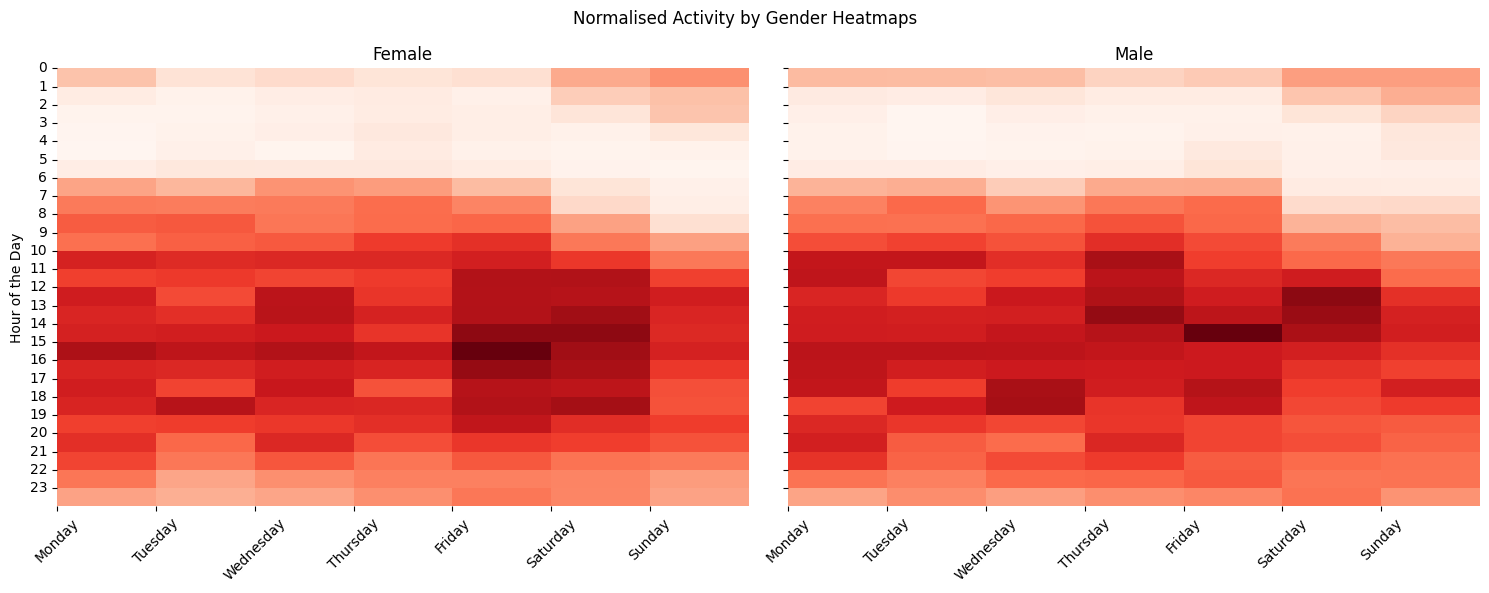

In [6]:
# plot male, female normalised activity heatmaps
plot_heatmap_pair(hm_female, hm_male, df1_title='Female', df2_title='Male', title='Normalised Activity by Gender Heatmaps')

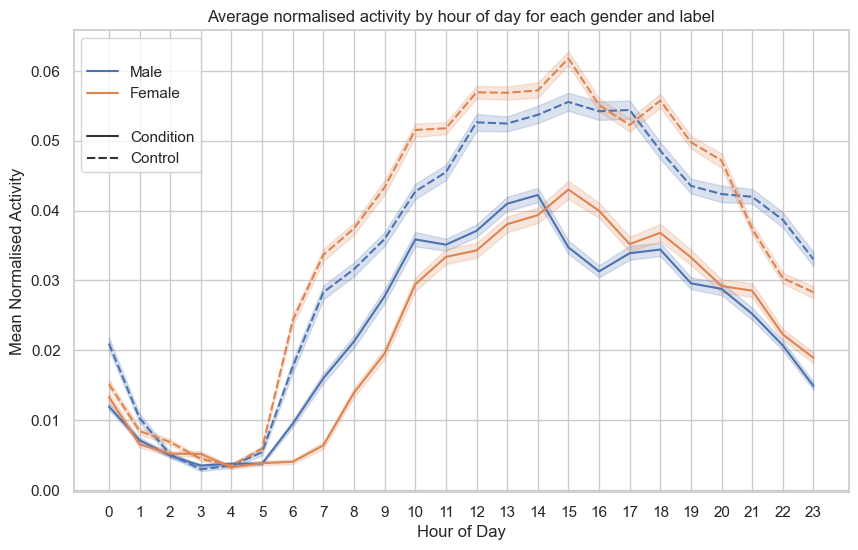

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# map gender and label values to meaningful names
gender_mapping = {1: 'Female', 2: 'Male'}
label_mapping = {0: 'Control', 1: 'Condition'}

# new columns 'gender_name' and 'label_name' with mapped values
df['gender_name'] = df['gender'].map(gender_mapping)
df['label_name'] = df['label'].map(label_mapping)

# plot average normalised activity by hour of day for each gender and label
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="hour_of_day", y="activity_norm", hue="gender_name", style="label_name", data=df)
plt.title("Average normalised activity by hour of day for each gender and label")

plt.xlabel('Hour of Day')
plt.ylabel('Mean Normalised Activity')

plt.xticks(range(0, 24))

# legend
legend = ax.legend()

# remove extra labels
legend.texts[0].set_text('')
legend.texts[1].set_text('Male')
legend.texts[2].set_text('Female')
legend.texts[3].set_text('')

plt.show()

# list of variable names to delete
var_list = ['gender_mapping', 'label_mapping']
# delete variables if they exist
for var in var_list:
    if var in locals():
        del locals()[var]


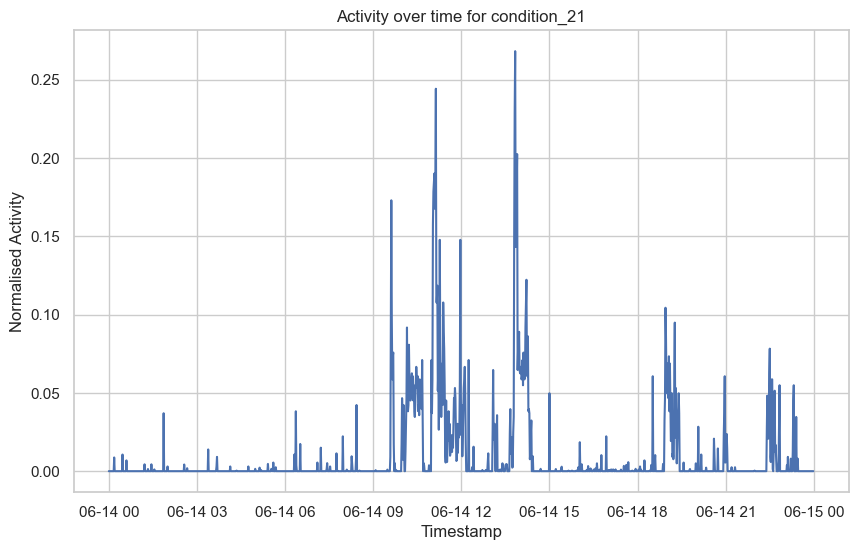

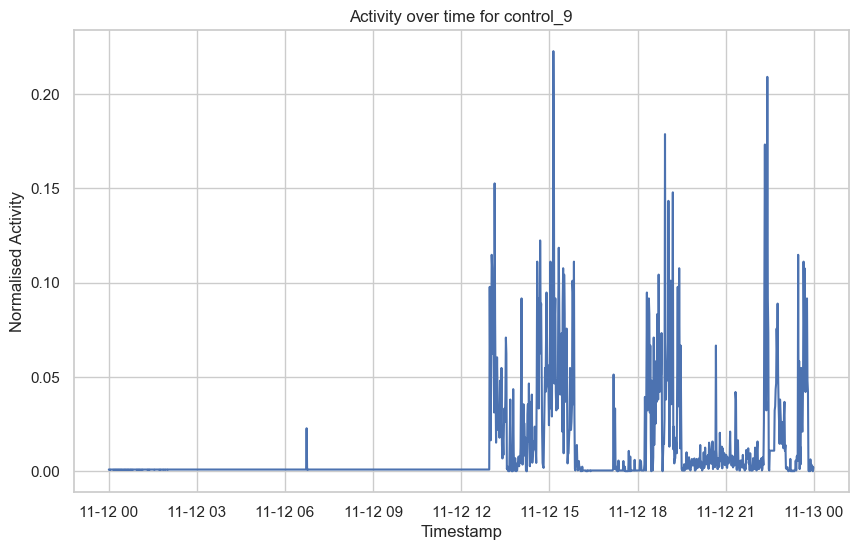

In [61]:
person = 'condition_21'
filtered_df = df[df['id']==person]
# filter for first date
filtered_df = filtered_df[filtered_df['date']==filtered_df['date'].min()]

# plot activity over time 
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['timestamp'], filtered_df['activity_norm'])
plt.title(f'Activity over time for {person}')
plt.xlabel('Timestamp')
plt.ylabel('Normalised Activity')
plt.show()

person = 'control_9'
filtered_df = df[df['id']==person]
# filter for first date
filtered_df = filtered_df[filtered_df['date']==filtered_df['date'].min()]

# plot activity over time 
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['timestamp'], filtered_df['activity_norm'])
plt.title(f'Activity over time for {person}')
plt.xlabel('Timestamp')
plt.ylabel('Normalised Activity')
plt.show()


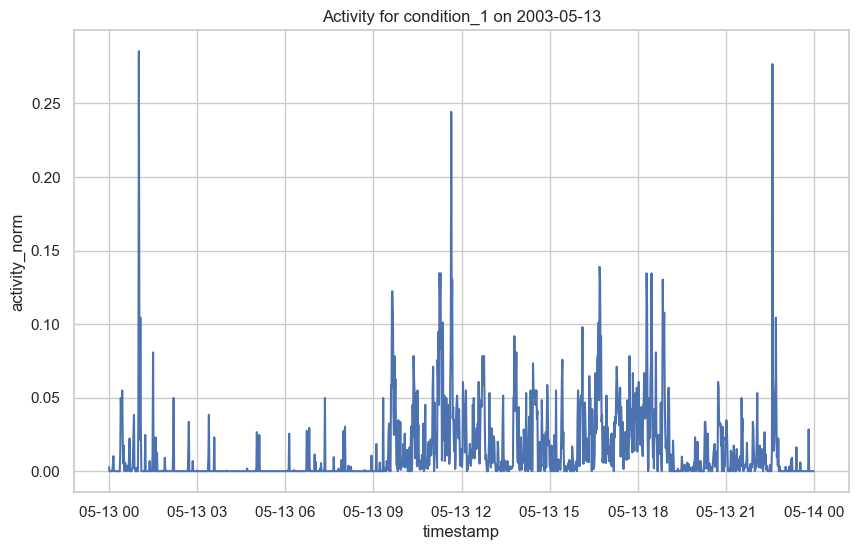

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_activity(df, id, date, x='hour_of_day', y='activity_norm'):
    # specified id and date
    filtered_df = df[(df['id'] == id) & (df['date'] == date)]

    # normalised activity by hour of day
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=filtered_df, x=x, y=y)
    ax.set_title(f'Activity for {id} on {date}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    #ax.set_xticks(range(25))  # Set x-axis ticks to be 0-24 hours
    plt.show()

# Example usage
plot_activity(df, 'condition_1', '2003-05-13', x='timestamp')


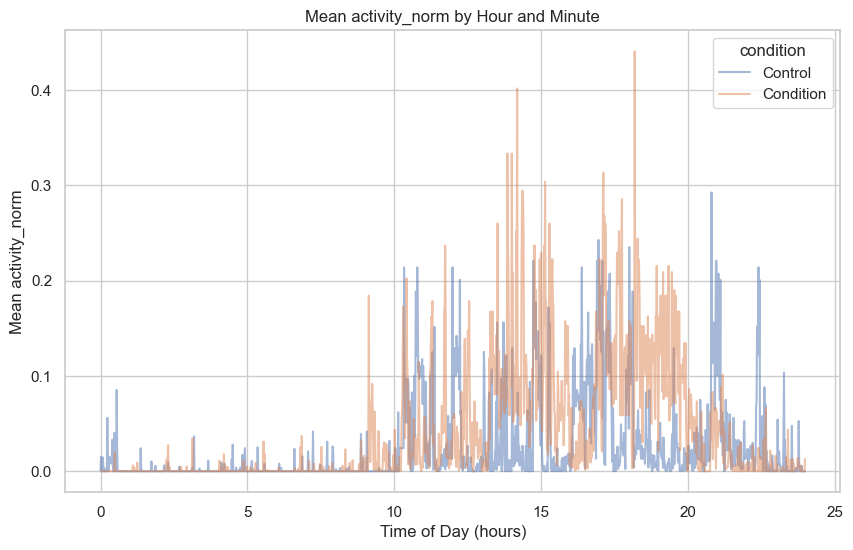

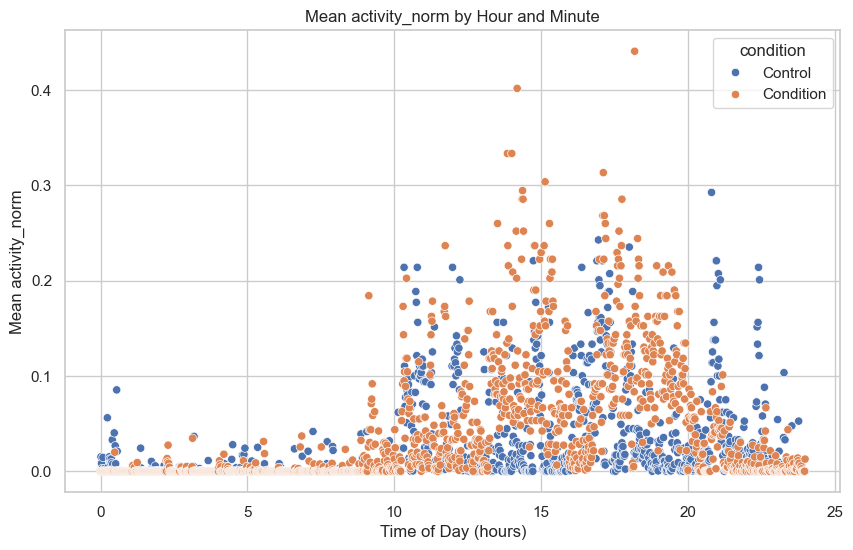

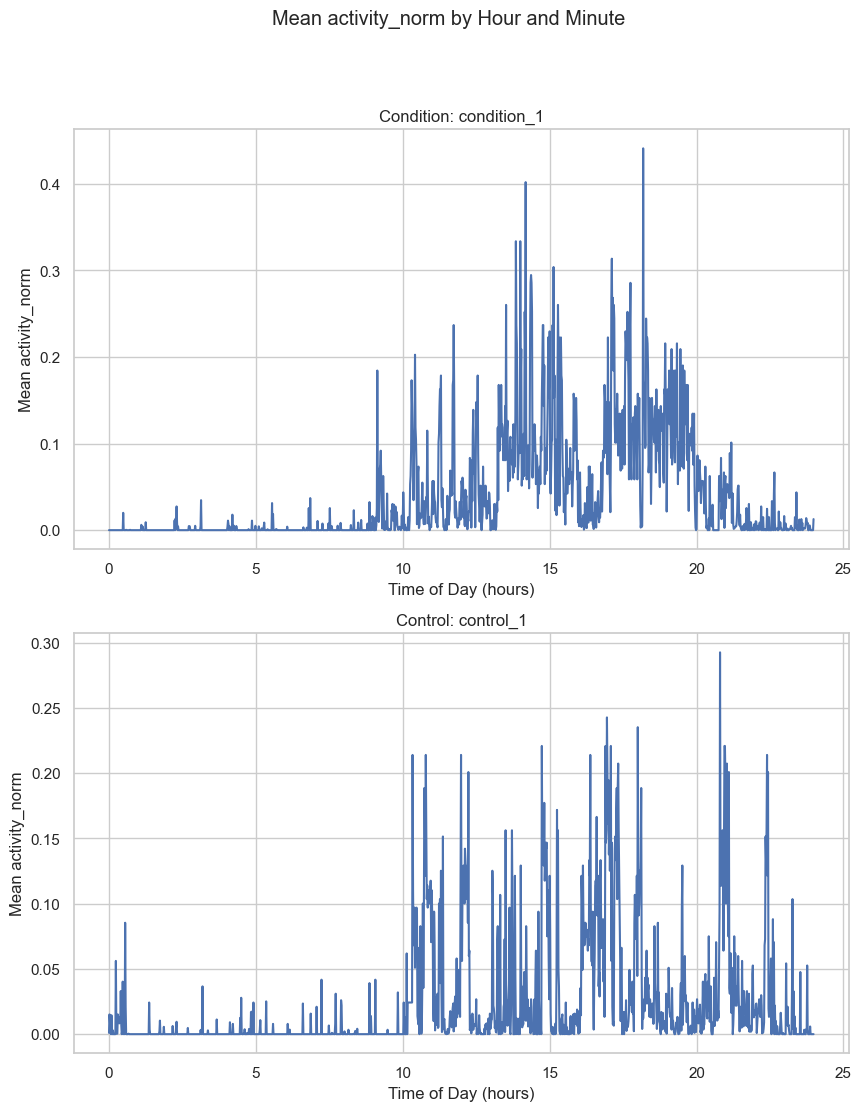

In [43]:
plot_singles(df, 'control_1', 'condition_1', activity='activity_norm', day_of_week=0, first_day=True)

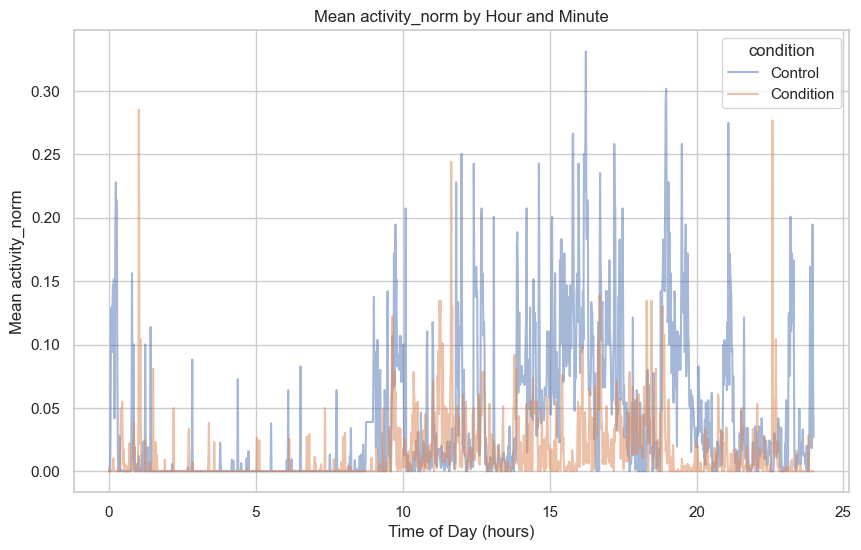

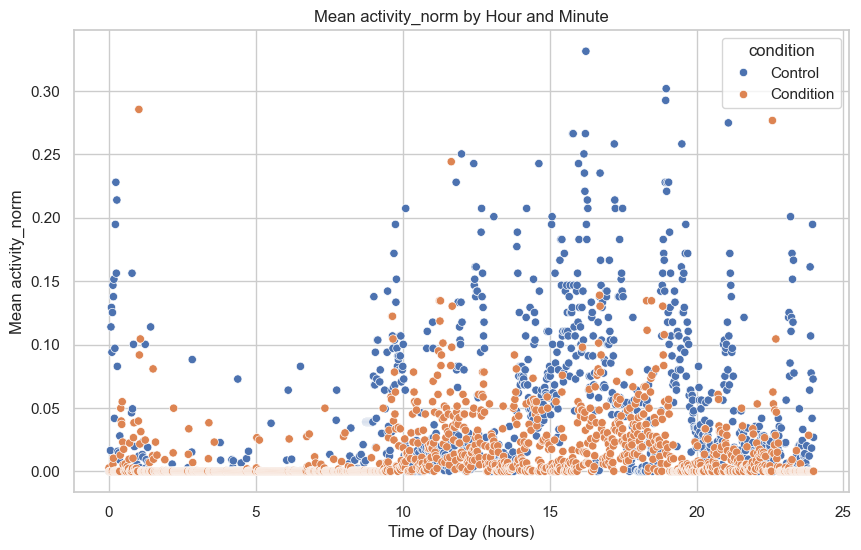

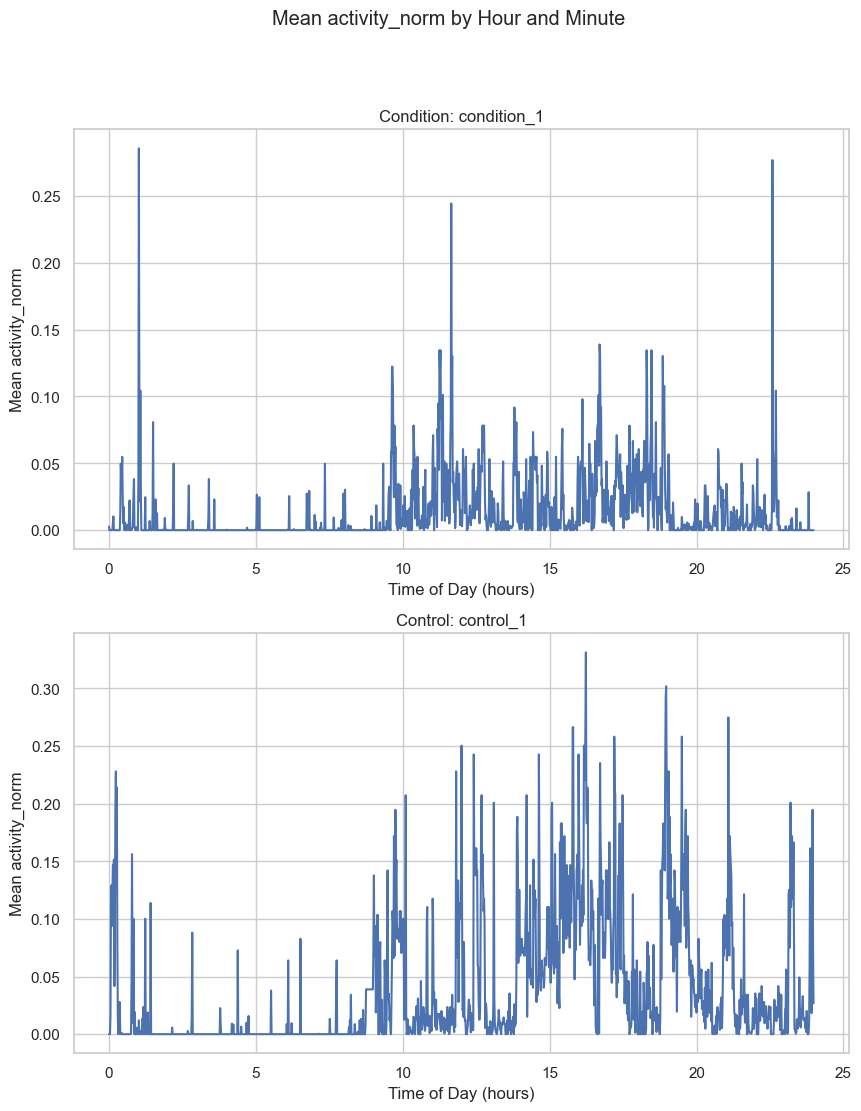

In [44]:
plot_singles(df, 'control_1', 'condition_1', activity='activity_norm', day_of_week=1, first_day=True)

### Timeseries - Decomposition

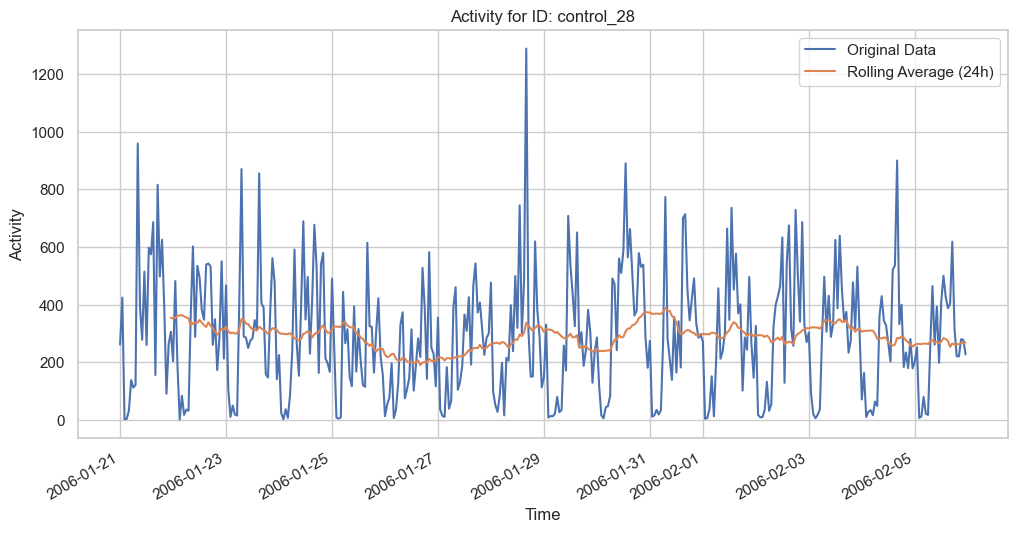

In [62]:
import pandas as pd
import matplotlib.pyplot as plt


# filter data for a specific id
id_to_plot = 'condition_23'
id_to_plot = 'control_28'
data = df[df['id'] == id_to_plot]

# 'timestamp' column to datetime
#data['timestamp'] = pd.to_datetime(data['timestamp'])

# timestamp as the index
data = data.set_index('timestamp')

# resample the data to a specific frequency (e.g., hourly)
resampled_data = data['activity'].resample('h').mean()

# plot the original data
plt.figure(figsize=(12, 6))
plt.plot(resampled_data, label='Original Data')

#  rolling average
rolling_avg = resampled_data.rolling(window=24).mean()  # 24-hour rolling average
plt.plot(rolling_avg, label='Rolling Average (24h)')

#  labels and title
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title(f'Activity for ID: {id_to_plot}')
plt.legend()

# rotate x-axis labels 
plt.gcf().autofmt_xdate()

plt.show()



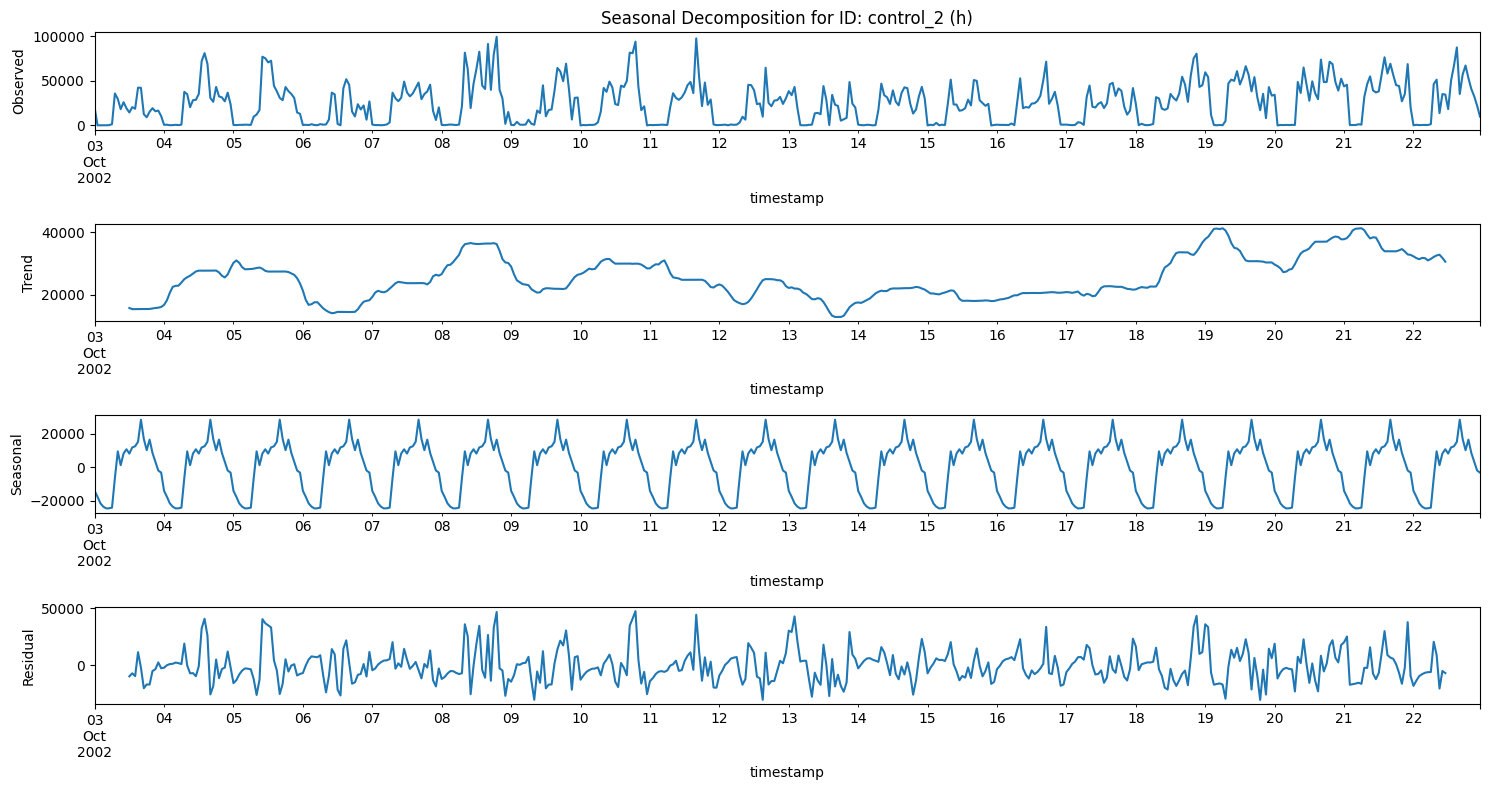

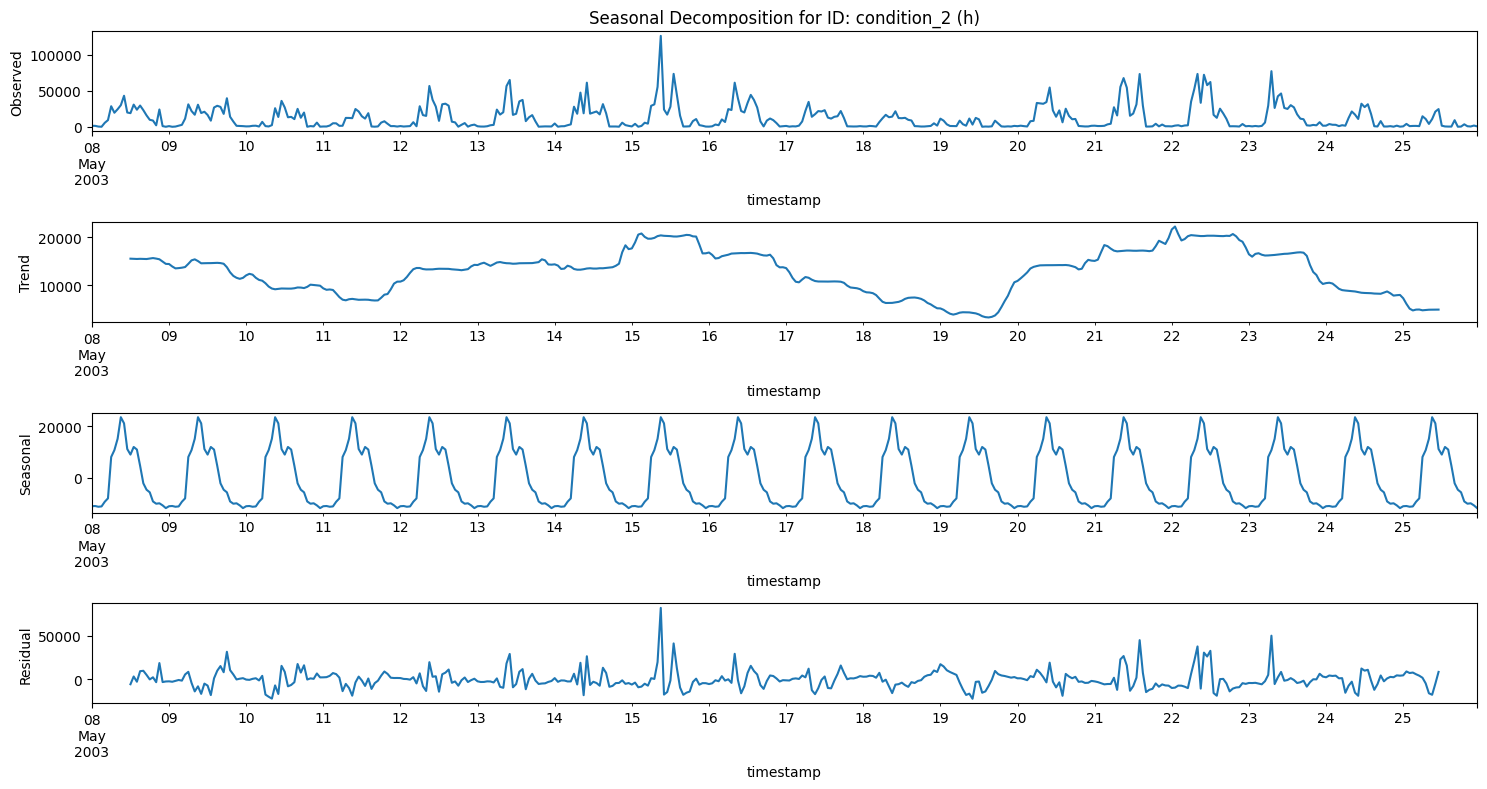

In [40]:
# seasonality for individual, hourly
plot_seasonal_decomposition(df, 'control_2')  
plot_seasonal_decomposition(df, 'condition_2') 

* **Observed**: original time series data
* **Trend**: overall direction or pattern in data over long time, ignoring short-term fluctuation - the underlying pattern
* **Seasonal**: patterns that repeat at regular intervales - e.g. hourly, daily
* **Residual** what's left after trendand seasonality removed - the noise, randomness

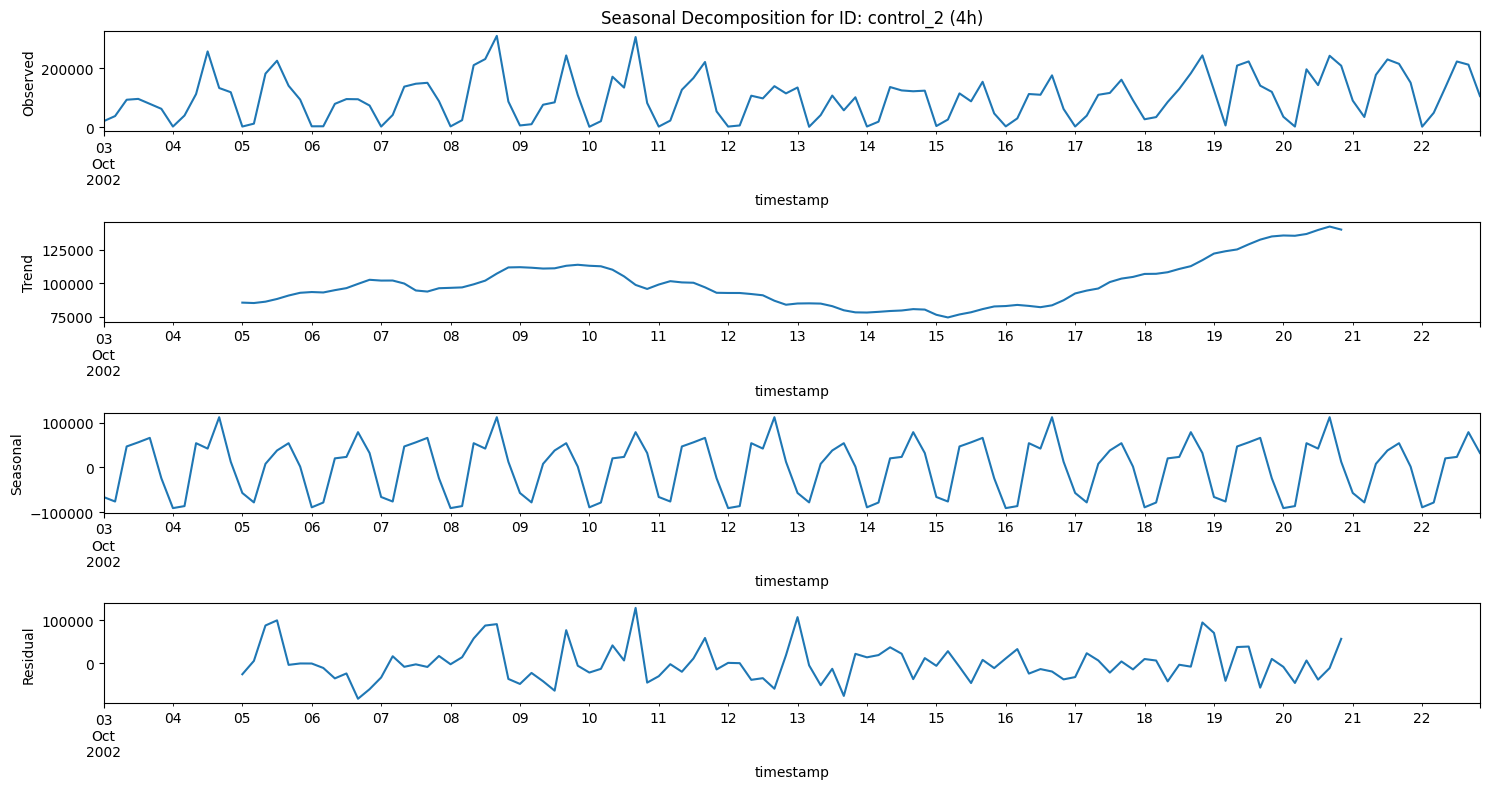

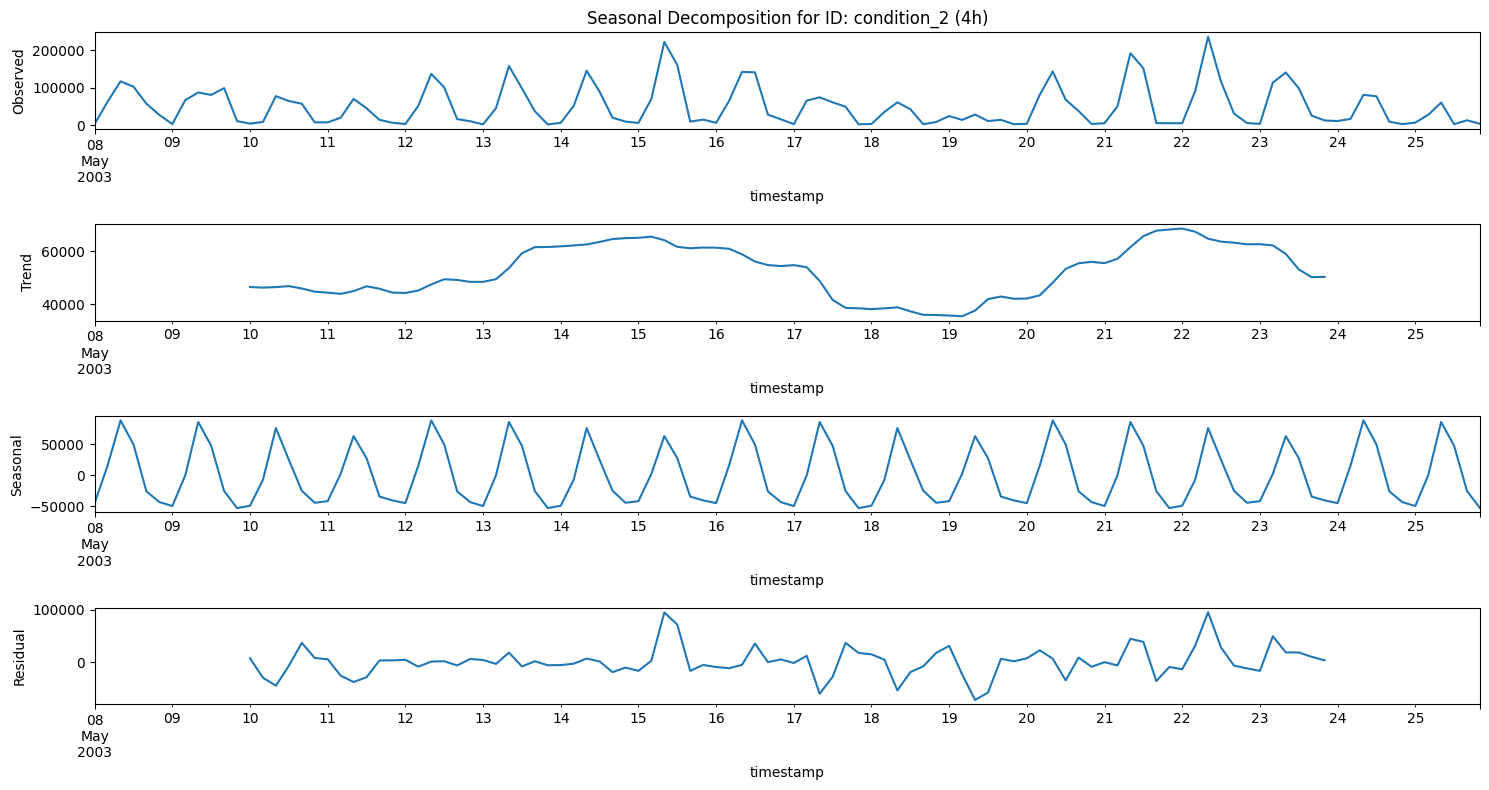

In [50]:
# seasonality for individual, hourly
plot_seasonal_decomposition(df, 'control_2', freq='4h')  
plot_seasonal_decomposition(df, 'condition_2', freq='4h') 